In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing


In [4]:
#loading csv data to dataframe

gold_data = pd.read_csv('/content/gld_price_data.csv')
#gold_data.head()
#SPX: Capitalization of 500 companies which are public, stock value
#GLD: Gold price, #SLV: Silver Price 
#USO: United States Oil Price
#EUR/USD: Currency Pair
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#statistics of the dataset
#gold_data.shape
#gold_data.info()
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
correlation = gold_data.corr()

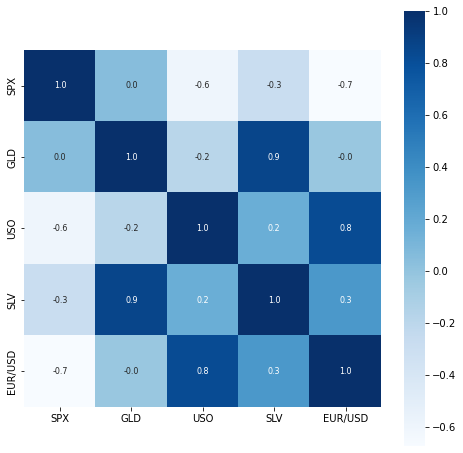

In [16]:
#constructing heat map to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square= True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


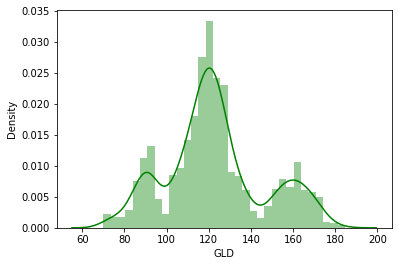

In [18]:
#distribution of GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [19]:
#splitting features and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=2)

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.24829913  82.02719974 116.02930068 127.70980077 120.61670136
 154.65819839 150.25519774 126.11510001 117.55859869 126.14010022
 116.69580112 172.08260098 140.84299826 167.79969815 115.20519994
 117.62230052 138.42020355 169.78070086 159.26390296 158.32419898
 155.1012003  125.43100029 176.21549922 157.41570376 125.13570028
  93.60569992  78.14810014 120.36900012 119.02669898 167.45159926
  88.19330077 125.39940018  91.17650068 117.57870042 121.11119929
 136.77520024 115.25270117 115.16900082 147.99089938 107.09640129
 104.40070249  87.11799787 126.58960086 118.07639978 152.1720984
 119.71299977 108.26680022 107.92199816  93.07280056 127.13139814
  75.11540026 113.69029947 121.18540018 111.18389896 118.83769875
 121.01359954 159.8713004  167.83110122 146.65439603  85.74439837
  94.33560012  86.89509858  90.49049996 119.04580068 126.53410052
 127.58360015 168.42459928 122.31849922 117.44899891  98.64300033
 168.17970085 142.91679802 132.03750242 121.18000212 121.13909926
 119.691400

In [26]:
# comparing predictions with actual values
error_score =  metrics.r2_score(y_test,test_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.9889944045716588


In [27]:
y_test = list(y_test)

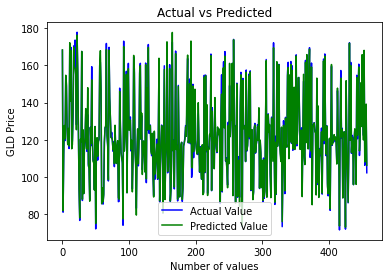

In [29]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
#note that the values are overlapping/very close, implying they are almost same